In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [23]:
avgPhotonsPerImage = 10
size=50
sigma = 1
p0=int(size/2)
minBlur = 1
fovSize = 10

In [15]:
def gaus_3d(intensity, x0, y0, z0, sigma):
    #y_values = np.arange(0, size, 1)
    X, Y, Z = np.meshgrid(x_values, x_values, x_values)
    return ((1)/(2*np.pi*(sigma**2))*np.exp(-(((X-x0)**2)+(Y-y0)**2+(Z-z0)**2)/(2*sigma**2)))

In [16]:
def gaus(x, m, s):
    return (1/(s*np.sqrt(2*np.pi))*np.exp(-(x-m)**2/(2*s**2)))                            

xx, yy, zz = np.meshgrid(np.arange(size), np.arange(size), np.arange(size))
gaus3d = avgPhotonsPerImage*gaus(xx, p0, 2)*gaus(yy, p0, 2)*gaus(zz, p0, 2)

In [17]:
def getFilterSigma(fx,fy,xp0,yp0,minBlurParam,fovSizeParam):
    return (1/fovSize**2)*((fx-xp0)**2+(fy-yp0)**2)+minBlur

In [18]:
def filteringGaussian(intensity, x0, y0, sigma):
    x_values = np.arange(0, size, 1)
    #y_values = np.arange(0, size, 1)
    X, Y = np.meshgrid(x_values, x_values)
    filterGauss = ((intensity)/(2*np.pi*(sigma**2))*np.exp(-(((X-x0)**2)+(Y-y0)**2)/(2*sigma**2)))
    return filterGauss

In [19]:
#toast = gaus3d[2]
#plt.imshow(toast)
#toast.shape

In [20]:
blurredToast = np.zeros((size,size))
blurredLoaf = []

loaf = [gaus3d[:,:,i] for i in range(0,size)]
#print(loaf)

for rowi, row in enumerate(loaf):
    for coli in range(0, len(row), 1):
        filterSigma = getFilterSigma(rowi, coli, p0, p0, minBlur, fovSize)
        intensityDist = gaus3d[rowi, coli]
        blurredToast += filteringGaussian(intensityDist, coli, rowi, filterSigma)
        blurredLoaf.append(blurredToast)
        #print(blurredLoaf)
#print(blurredLoaf)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



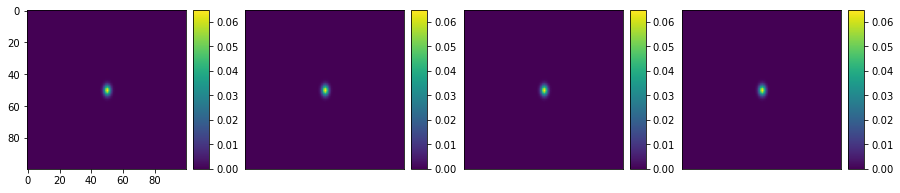

In [22]:
print(blurredLoaf)
avgImage = np.mean(blurredLoaf[:2], 0)
avgImage2 = np.mean(blurredLoaf[:4], 0)
avgImage3 = np.mean(blurredLoaf[:20], 0)
avgImage4 = np.mean(blurredLoaf, 0)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=[15, 15])

img0 = ax0.imshow(avgImage)
#ax0.set_title('first 10 images averaged')

divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="10%", pad=0.10)
cb0 = plt.colorbar(img0, cax=cax)

img1 = ax1.imshow(avgImage2)
ax1.set_xticks([])
ax1.set_yticks([])
#ax1.set_title('first 50 images averaged')

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="10%", pad=0.10)
cb = plt.colorbar(img1, cax=cax)

img2 = ax2.imshow(avgImage3)
ax2.set_xticks([])
ax2.set_yticks([])
#ax2.set_title('first 150 images averaged')

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="10%", pad=0.10)
cb = plt.colorbar(img2, cax=cax)

img3 = ax3.imshow(avgImage4)
ax3.set_xticks([])
ax3.set_yticks([])
#ax3.set_title('all 400 images averaged')

divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="10%", pad=0.10)
cb = plt.colorbar(img3, cax=cax)

plt.show()

for each slice in gaus3d:
    print slice
    apply blur to slice 
    put blurred slice in list
    
average each element in blurred slice list
show the result



toast0 = gaus3d[0]
toast1 = gaus3d[1]
toast2 = gaus3d[2]
toast3 = gaus3d[3]
print(toast0, toast1, toast2)